# Two Scales on the Same Plot

Original example: https://eliocamp.github.io/codigo-r/2018/09/multiple-color-and-fill-scales-with-ggplot2/

Datasets:
- [air.mon.mean.nc](https://psl.noaa.gov/repository/entry/show?entryid=d3422997-979a-4abb-9bf2-503a80bb647f)
- [slp.mon.mean.nc](https://www.psl.noaa.gov/repository/search/do?metadata_type_thredds.property=thredds.property&metadata_attr1_thredds.property=grib_source&metadata_attr2_thredds.property=pres.sfc.mon.mean.grib)

In [1]:
import pandas as pd

from lets_plot import *
from lets_plot.tilesets import *


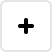
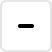
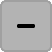
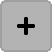
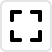
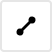
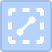
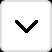
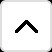
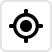
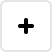
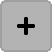
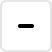
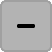
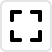
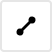
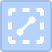
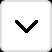
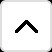
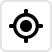

In [2]:
LetsPlot.setup_html()

In [3]:
def get_weights(f, max_weight):
    import numpy as np
    x0, y0 = f.min(), 0
    x1, y1 = f.max(), max_weight
    slope = (y1 - y0) / (x1 - x0)
    intercept = y1 - x1 * slope
    return np.round(slope * f + intercept).astype(int)

def transform_data(df, value_col, max_repeats):
    weights_df = df.assign(weight=get_weights(df[value_col], max_weight=max_repeats)).drop(columns=[value_col])
    return weights_df.loc[weights_df.index.repeat(weights_df["weight"])].drop(columns=["weight"]).reset_index(drop=True)

In [4]:
air_df = pd.read_csv("../data/air.csv")
print(air_df.shape)
air_df.head()

(10512, 3)


lat   lon        air
0  90.0   0.0 -20.349998
1  90.0   2.5 -20.349998
2  90.0   5.0 -20.349998
3  90.0   7.5 -20.349998
4  90.0  10.0 -20.349998

In [5]:
slp_df = pd.read_csv("../data/slp.csv")
print(slp_df.shape)
slp_df.head()

(10512, 3)


lat   lon         slp
0  90.0   0.0  1022.19806
1  90.0   2.5  1022.19806
2  90.0   5.0  1022.19806
3  90.0   7.5  1022.19806
4  90.0  10.0  1022.19806

In [6]:
ggplot(mapping=aes("lon", "lat")) + \
    geom_livemap(location=[-100, -55, -30, 24], tiles=LETS_PLOT_LIGHT) + \
    geom_density2d(aes(paint_a='..level..'), data=transform_data(air_df, "air", 15), \
                   bins=25, color_by='paint_a', size=1) + \
    geom_density2d(aes(paint_b='..level..'), data=transform_data(slp_df, "slp", 15), \
                   bins=25, color_by='paint_b', size=.5) + \
    scale_gradient2('paint_a', name="Air temperature\n(density level)", \
                    low="#d73027", mid="#ffffbf", high="#4575b4", midpoint=1.5e-05) + \
    scale_viridis('paint_b', name="Sea level pressure\n(density level)") + \
    ggsize(600, 600)